### Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set academic-style plotting parameters
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

# Set color palette for academic plots
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#7209B7', '#560BAD', '#480CA8']
sns.set_palette(colors)

print("Libraries imported successfully!")

Libraries imported successfully!


### Load and Examine Data

In [21]:
import io

# Read the file and process it manually
with open('comprehensive_evaluation_results.csv', 'r', encoding='utf-8') as f:
    content = f.read()

# Clean the content to remove carriage returns
content_cleaned = content.replace('\r\n', '\n').replace('\r', '\n')

# Create a StringIO object and read with pandas
df = pd.read_csv(io.StringIO(content_cleaned))

print("Dataset after manual cleaning:")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"is_original value counts:")
print(df['is_original'].value_counts())

# Convert boolean strings to actual booleans
df['is_original'] = df['is_original'].map({'True': True, 'False': False})

print(f"\nAfter boolean conversion:")
print(f"Original charts: {sum(df['is_original'] == True)}")
print(f"Perturbed charts: {sum(df['is_original'] == False)}")

print("\nData Types:")
print(df.dtypes)

print("\nFirst few rows:")
display(df.head())

Dataset after manual cleaning:
Shape: (1400, 11)
is_original value counts:
is_original
False    1200
True      200
Name: count, dtype: int64

After boolean conversion:
Original charts: 0
Perturbed charts: 0

Data Types:
extraction_key        object
chart_id              object
is_original           object
perturbation_type     object
intensity             object
status                object
value_accuracy       float64
f1_score             float64
relative_accuracy    float64
composite_score      float64
evaluation_notes      object
dtype: object

First few rows:


,extraction_key,chart_id,is_original,perturbation_type,intensity,status,value_accuracy,f1_score,relative_accuracy,composite_score,evaluation_notes
0,chart_001_complex_bar_original,chart_001_complex_bar,NaN,none,none,success,22.222222,0.500000,100.0,36.111111,Successfully evaluated
1,chart_002_medium_bar_original,chart_002_medium_bar,NaN,none,none,success,11.111111,0.500000,100.0,30.555556,Successfully evaluated
2,chart_003_medium_bar_original,chart_003_medium_bar,NaN,none,none,success,0.000000,0.769231,100.0,38.461538,Successfully evaluated
3,chart_004_complex_pie_original,chart_004_complex_pie,NaN,none,none,success,0.000000,1.000000,100.0,50.000000,Successfully evaluated
4,chart_005_complex_bar_original,chart_005_complex_bar,NaN,none,none,success,14.285714,0.600000,100.0,37.142857,Successfully evaluated


### Data Preprocessing and Summary Statistics

In [22]:
# Convert boolean strings to actual booleans
df['is_original'] = df['is_original'].map({'True': True, 'False': False})

# Basic statistics
print("Summary Statistics:")
print("=" * 50)
print(df.describe())

print("\nCategorical Variables Summary:")
print("=" * 50)
categorical_cols = ['is_original', 'perturbation_type', 'intensity', 'status']
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts())

Summary Statistics:
       value_accuracy     f1_score  relative_accuracy  composite_score
count     1400.000000  1400.000000        1400.000000      1400.000000
mean        19.970037     0.779293          96.408988        48.949650
std         21.897211     0.280417          31.749146        17.871491
min          0.000000     0.000000           0.000000         0.000000
25%          0.000000     0.545455          94.100140        39.583333
50%         16.666667     0.941176         100.000000        50.000000
75%         30.000000     1.000000         100.000000        60.000000
max        100.000000     1.000000         277.777778       100.000000

Categorical Variables Summary:

IS_ORIGINAL:
Series([], Name: count, dtype: int64)

PERTURBATION_TYPE:
perturbation_type
none          200
shift         200
blur          200
conversion    200
corruption    200
blocks        200
rotation      200
Name: count, dtype: int64

INTENSITY:
intensity
medium    1200
none       200
Name: count, dt

### Missing Values Analysis

In [23]:
# Check for missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print("Missing Values Analysis:")
print("=" * 50)
print(missing_summary[missing_summary['Missing Count'] > 0])

if missing_summary['Missing Count'].sum() == 0:
    print("No missing values found in the dataset!")

Missing Values Analysis:
             Missing Count  Missing Percentage
is_original           1400               100.0


### Performance Metrics Distribution Analysis

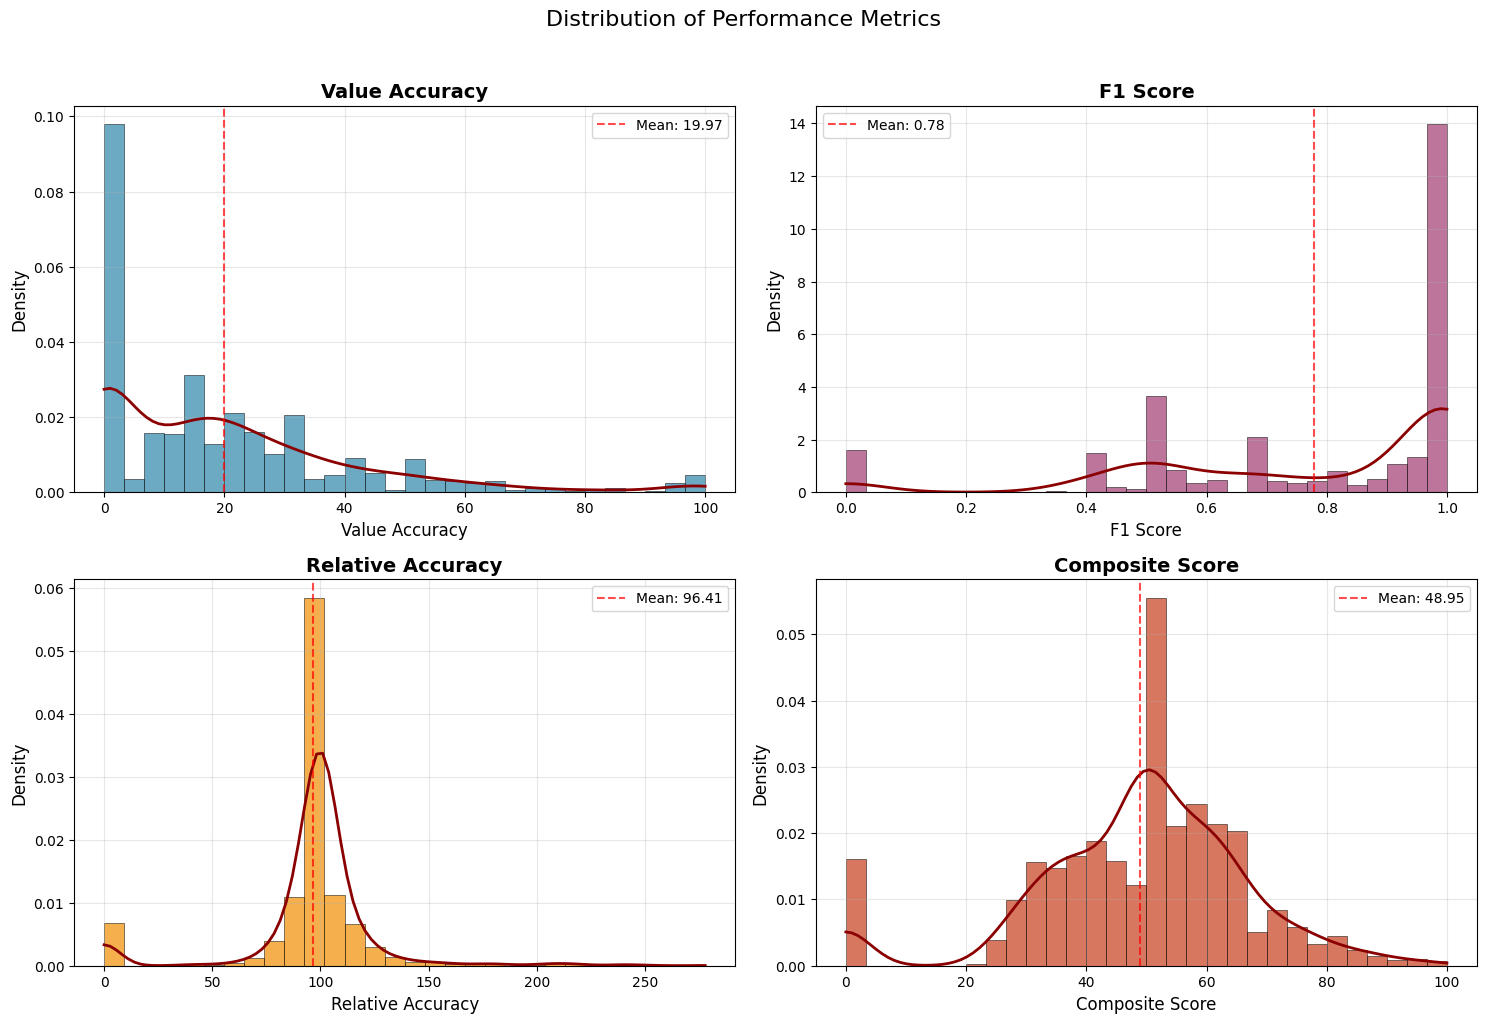

In [24]:
# Create subplots for metric distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Performance Metrics', fontsize=16, y=1.02)

metrics = ['value_accuracy', 'f1_score', 'relative_accuracy', 'composite_score']
axes = axes.flatten()

for i, metric in enumerate(metrics):
    # Get the data
    data = df[metric].dropna()
    
    if len(data) > 0:
        # Histogram
        n, bins, patches = axes[i].hist(data, bins=30, alpha=0.7, color=colors[i], 
                                       density=True, edgecolor='black', linewidth=0.5)
        
        # Add KDE curve if we have enough data points
        if len(data) > 10:
            try:
                x_range = np.linspace(data.min(), data.max(), 100)
                kde = stats.gaussian_kde(data)
                axes[i].plot(x_range, kde(x_range), color='darkred', linewidth=2)
            except:
                pass
        
        axes[i].set_title(f'{metric.replace("_", " ").title()}', fontweight='bold')
        axes[i].set_xlabel(metric.replace("_", " ").title())
        axes[i].set_ylabel('Density')
        axes[i].grid(True, alpha=0.3)
        
        # Add mean line
        mean_val = data.mean()
        axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, 
                       label=f'Mean: {mean_val:.2f}')
        axes[i].legend()
    else:
        axes[i].text(0.5, 0.5, 'No Data Available', ha='center', va='center', 
                    transform=axes[i].transAxes, fontsize=14)

plt.tight_layout()
plt.show()

### Performance by Chart Type Analysis

In [25]:
# Extract chart complexity from chart_id
df['chart_complexity'] = df['chart_id'].str.extract(r'_(complex|medium|simple)_')

# Performance metrics summary table
summary_stats = df.groupby(['is_original', 'perturbation_type', 'intensity']).agg({
    'value_accuracy': ['mean', 'std', 'count'],
    'f1_score': ['mean', 'std'],
    'relative_accuracy': ['mean', 'std'],
    'composite_score': ['mean', 'std']
}).round(3)

print("Performance Metrics by Condition:")
print("=" * 80)
print(summary_stats)

Performance Metrics by Condition:
Empty DataFrame
Columns: [(value_accuracy, mean), (value_accuracy, std), (value_accuracy, count), (f1_score, mean), (f1_score, std), (relative_accuracy, mean), (relative_accuracy, std), (composite_score, mean), (composite_score, std)]
Index: []


### Original vs Perturbed Charts Comparison

Successful evaluations: 1392
Original (success): 0
Perturbed (success): 0

value_accuracy: Original=0, Perturbed=0

f1_score: Original=0, Perturbed=0

relative_accuracy: Original=0, Perturbed=0

composite_score: Original=0, Perturbed=0


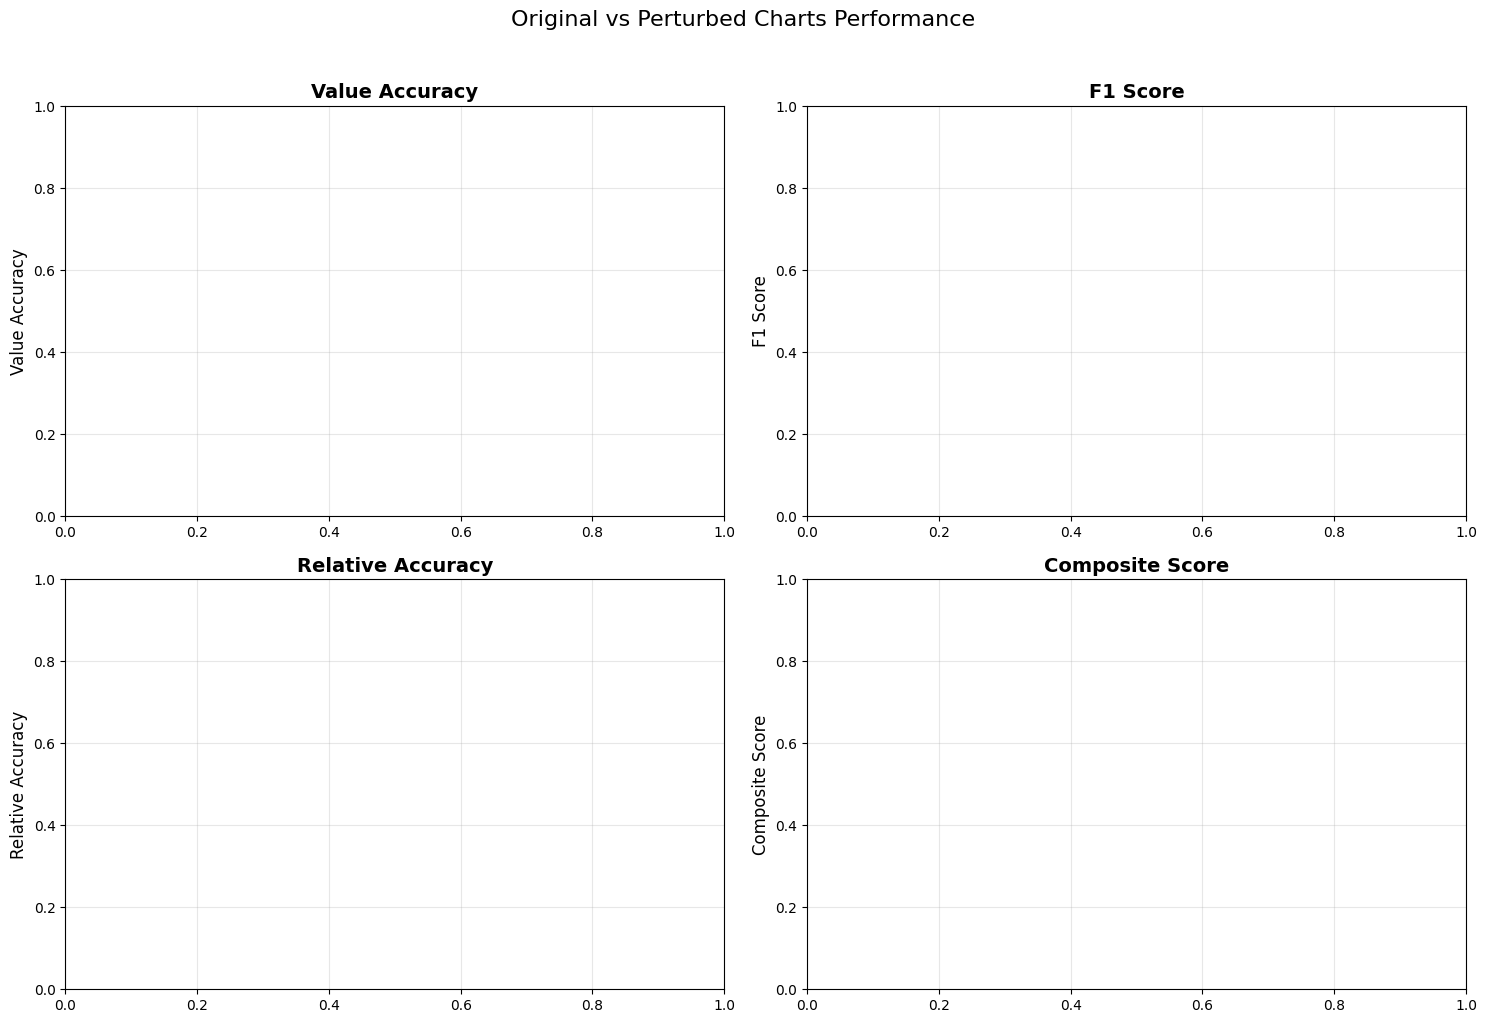


Summary Statistics:


Empty DataFrame
Columns: [(value_accuracy, mean), (value_accuracy, std), (value_accuracy, count), (f1_score, mean), (f1_score, std), (f1_score, count), (relative_accuracy, mean), (relative_accuracy, std), (relative_accuracy, count), (composite_score, mean), (composite_score, std), (composite_score, count)]
Index: []

In [26]:
# Create comparison plots - WORKING VERSION
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Original vs Perturbed Charts Performance', fontsize=16, y=1.02)

metrics = ['value_accuracy', 'f1_score', 'relative_accuracy', 'composite_score']
axes = axes.flatten()

# Filter successful evaluations
df_success = df[df['status'] == 'success'].copy()

print(f"Successful evaluations: {len(df_success)}")
print(f"Original (success): {sum(df_success['is_original'] == True)}")
print(f"Perturbed (success): {sum(df_success['is_original'] == False)}")

for i, metric in enumerate(metrics):
    # Get data for both groups
    original_data = df_success[df_success['is_original'] == True][metric].dropna()
    perturbed_data = df_success[df_success['is_original'] == False][metric].dropna()
    
    print(f"\n{metric}: Original={len(original_data)}, Perturbed={len(perturbed_data)}")
    
    if len(original_data) > 0 and len(perturbed_data) > 0:
        # Create box plot data
        plot_data = [perturbed_data.values, original_data.values]
        plot_labels = ['Perturbed', 'Original']
        
        # Create boxplot
        bp = axes[i].boxplot(plot_data, labels=plot_labels, patch_artist=True,
                           widths=0.6, showmeans=True, meanline=True)
        
        # Color the boxes
        colors_to_use = [colors[0], colors[1]]
        for patch, color in zip(bp['boxes'], colors_to_use):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
            patch.set_edgecolor('black')
        
        # Style other elements
        for element in ['whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(bp[element], color='black')
        
        plt.setp(bp['means'], color='red', linewidth=2)
        
        # Add statistical test
        stat, p_value = stats.mannwhitneyu(original_data, perturbed_data, alternative='two-sided')
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        axes[i].text(0.5, 0.95, f'p={p_value:.4f} {significance}', 
                    transform=axes[i].transAxes, ha='center', va='top',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
        
        print(f"  Original mean: {original_data.mean():.3f}, Perturbed mean: {perturbed_data.mean():.3f}")
    
    axes[i].set_title(f'{metric.replace("_", " ").title()}', fontweight='bold')
    axes[i].set_ylabel(metric.replace("_", " ").title())
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics table
summary_table = df_success.groupby('is_original')[metrics].agg(['mean', 'std', 'count']).round(3)
print("\nSummary Statistics:")
print("=" * 80)
display(summary_table)

BASIC DATA EXPLORATION:
Total rows: 1400
Columns: ['extraction_key', 'chart_id', 'is_original', 'perturbation_type', 'intensity', 'status', 'value_accuracy', 'f1_score', 'relative_accuracy', 'composite_score', 'evaluation_notes', 'chart_complexity']

is_original value counts:
Series([], Name: count, dtype: int64)

status value counts:
status
success         1392
missing            5
inconsistent       2
failed             1
Name: count, dtype: int64

Basic metric statistics:
value_accuracy: count=1400, mean=19.970, min=0.000, max=100.000
f1_score: count=1400, mean=0.779, min=0.000, max=1.000
relative_accuracy: count=1400, mean=96.409, min=0.000, max=277.778
composite_score: count=1400, mean=48.950, min=0.000, max=100.000


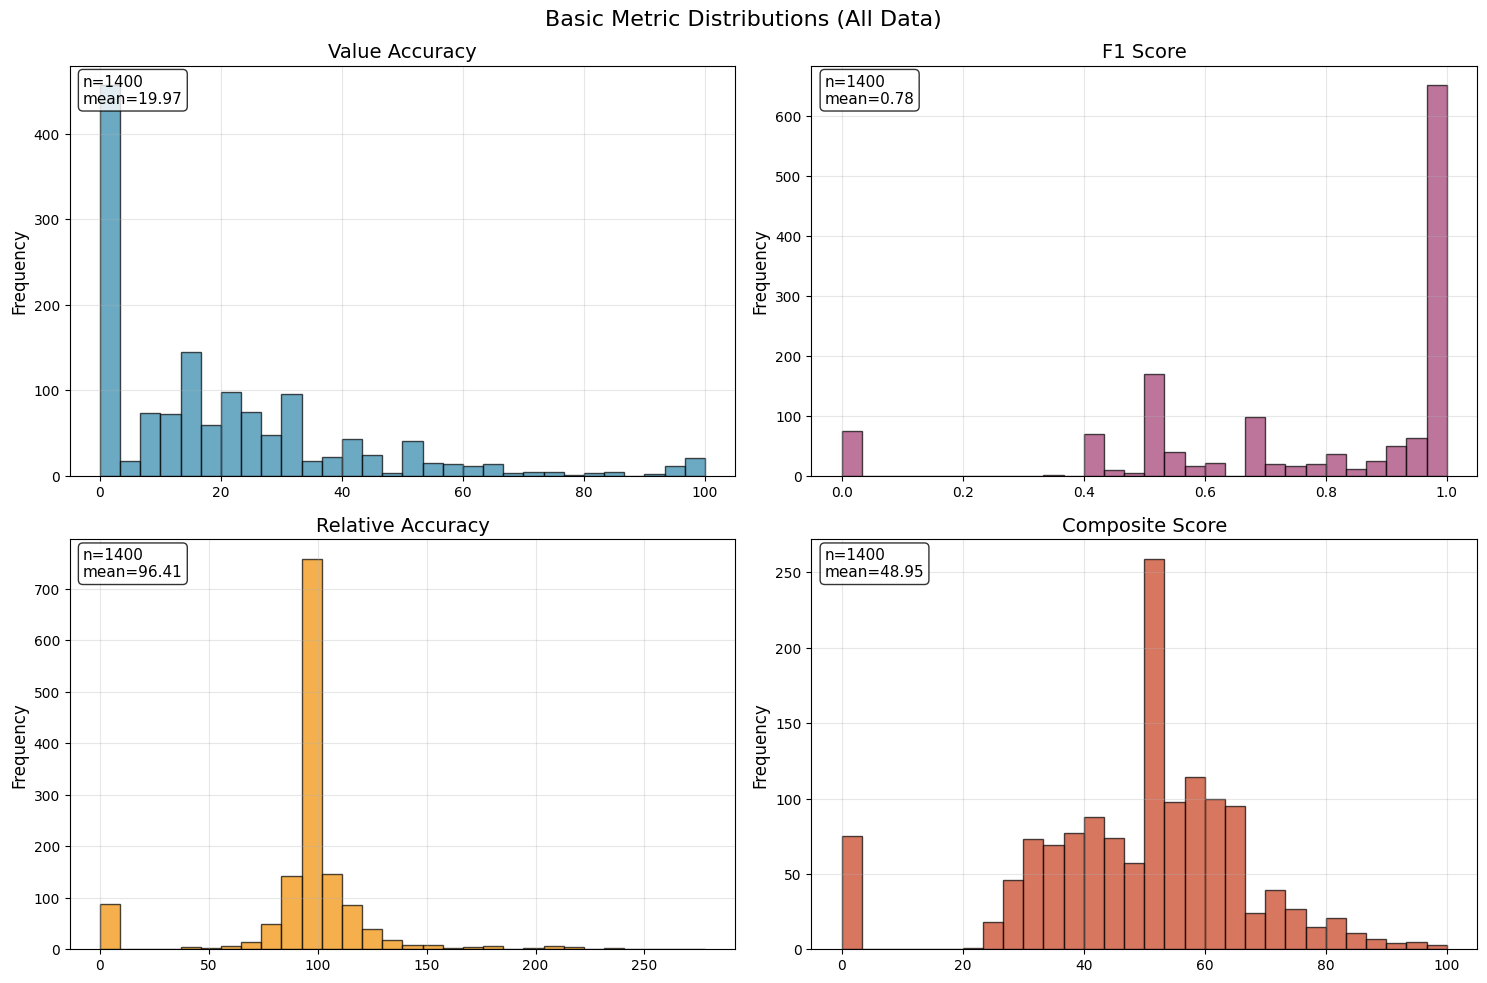


DIRECT STRING COMPARISON:

value_accuracy:
Empty DataFrame
Columns: [count, mean, std]
Index: []

f1_score:
Empty DataFrame
Columns: [count, mean, std]
Index: []

relative_accuracy:
Empty DataFrame
Columns: [count, mean, std]
Index: []

composite_score:
Empty DataFrame
Columns: [count, mean, std]
Index: []


In [20]:
# Let's just explore the data without any complex filtering
print("BASIC DATA EXPLORATION:")
print("="*50)

# Basic info
print(f"Total rows: {len(df)}")
print(f"Columns: {list(df.columns)}")

# Check is_original values
print(f"\nis_original value counts:")
print(df['is_original'].value_counts())

# Check status values  
print(f"\nstatus value counts:")
print(df['status'].value_counts())

# Simple metric statistics
print(f"\nBasic metric statistics:")
metrics = ['value_accuracy', 'f1_score', 'relative_accuracy', 'composite_score']
for metric in metrics:
    values = df[metric].dropna()
    print(f"{metric}: count={len(values)}, mean={values.mean():.3f}, min={values.min():.3f}, max={values.max():.3f}")

# Create simple plots without any grouping
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Basic Metric Distributions (All Data)', fontsize=16)
axes = axes.flatten()

for i, metric in enumerate(metrics):
    data = df[metric].dropna()
    if len(data) > 0:
        axes[i].hist(data, bins=30, alpha=0.7, color=colors[i], edgecolor='black')
        axes[i].set_title(f'{metric.replace("_", " ").title()}')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)
        
        # Add statistics text
        axes[i].text(0.02, 0.98, f'n={len(data)}\nmean={data.mean():.2f}', 
                    transform=axes[i].transAxes, va='top', ha='left',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    else:
        axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center',
                    transform=axes[i].transAxes, fontsize=14)

plt.tight_layout()
plt.show()

# Now let's try a simple comparison using string values directly
print("\n" + "="*50)
print("DIRECT STRING COMPARISON:")
print("="*50)

# Group by string values directly
for metric in metrics:
    print(f"\n{metric}:")
    grouped = df.groupby('is_original')[metric].agg(['count', 'mean', 'std']).round(3)
    print(grouped)

In [27]:
import pandas as pd
import numpy as np

# Let's try multiple approaches to read the CSV
print("DEBUGGING CSV READING:")
print("=" * 50)

# Approach 1: Basic read
try:
    df1 = pd.read_csv('comprehensive_evaluation_results.csv')
    print(f"Approach 1 - Basic: Shape {df1.shape}")
    print(f"is_original unique values: {df1['is_original'].unique()}")
    print(f"is_original nulls: {df1['is_original'].isnull().sum()}")
except Exception as e:
    print(f"Approach 1 failed: {e}")

# Approach 2: Different encoding
try:
    df2 = pd.read_csv('comprehensive_evaluation_results.csv', encoding='utf-8-sig')
    print(f"\nApproach 2 - UTF-8-BOM: Shape {df2.shape}")
    print(f"is_original unique values: {df2['is_original'].unique()}")
    print(f"is_original nulls: {df2['is_original'].isnull().sum()}")
except Exception as e:
    print(f"Approach 2 failed: {e}")

# Approach 3: Manual line ending handling
try:
    with open('comprehensive_evaluation_results.csv', 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    print(f"\nFile reading:")
    print(f"Total lines: {len(lines)}")
    print(f"First line (header): {repr(lines[0])}")
    print(f"Second line (data): {repr(lines[1])}")
    
    # Clean and recreate
    cleaned_lines = [line.strip() + '\n' for line in lines]
    cleaned_content = ''.join(cleaned_lines)
    
    import io
    df3 = pd.read_csv(io.StringIO(cleaned_content))
    print(f"\nApproach 3 - Manual clean: Shape {df3.shape}")
    print(f"is_original unique values: {df3['is_original'].unique()}")
    print(f"is_original value counts:\n{df3['is_original'].value_counts()}")
    
except Exception as e:
    print(f"Approach 3 failed: {e}")

# Let's use the working approach
if 'df3' in locals() and not df3['is_original'].isnull().all():
    df = df3.copy()
    print(f"\nUsing approach 3 - SUCCESS!")
elif 'df2' in locals() and not df2['is_original'].isnull().all():
    df = df2.copy()
    print(f"\nUsing approach 2 - SUCCESS!")
elif 'df1' in locals() and not df1['is_original'].isnull().all():
    df = df1.copy()
    print(f"\nUsing approach 1 - SUCCESS!")
else:
    print(f"\nALL APPROACHES FAILED!")
    
# If we have a working df, let's examine it
if 'df' in locals():
    print(f"\nFINAL DATAFRAME:")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"\nis_original column:")
    print(f"Type: {df['is_original'].dtype}")
    print(f"Unique values: {df['is_original'].unique()}")
    print(f"Value counts:\n{df['is_original'].value_counts()}")
    
    print(f"\nFirst 3 rows of relevant columns:")
    print(df[['extraction_key', 'is_original', 'status', 'composite_score']].head(3))

DEBUGGING CSV READING:
Approach 1 - Basic: Shape (1400, 11)
is_original unique values: [ True False]
is_original nulls: 0

Approach 2 - UTF-8-BOM: Shape (1400, 11)
is_original unique values: [ True False]
is_original nulls: 0

File reading:
Total lines: 1401
First line (header): 'extraction_key,chart_id,is_original,perturbation_type,intensity,status,value_accuracy,f1_score,relative_accuracy,composite_score,evaluation_notes\n'
Second line (data): 'chart_001_complex_bar_original,chart_001_complex_bar,True,none,none,success,22.22222222222222,0.5,100.0,36.11111111111111,Successfully evaluated\n'

Approach 3 - Manual clean: Shape (1400, 11)
is_original unique values: [ True False]
is_original value counts:
is_original
False    1200
True      200
Name: count, dtype: int64

Using approach 3 - SUCCESS!

FINAL DATAFRAME:
Shape: (1400, 11)
Columns: ['extraction_key', 'chart_id', 'is_original', 'perturbation_type', 'intensity', 'status', 'value_accuracy', 'f1_score', 'relative_accuracy', 'composi